## Zjazd 5 - 03.12.2022 - Cezary Graban s21752, Paweł Iwiński s19771
### Podstawowe użycie sieci neuronowych - warstwy konwolucyjne, glebokie, dropout, etc...

##### Dataset 1 - Sonar Dataset - The Sonar Dataset involves the prediction of whether or not an object is a mine or a rock given the strength of sonar returns at different angles.
###### source: https://www.kaggle.com/datasets/ypzhangsam/sonaralldata

##### Dataset 2 - CIFAR10 - The CIFAR-10 dataset is a collection of images that are commonly used to train machine learning. CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.
###### source: https://www.kaggle.com/c/cifar-10

##### Dataset 3 - Fashion MNIST - Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
###### source: https://www.kaggle.com/datasets/zalando-research/fashionmnist

##### Dataset 4 - Tweets - Determining if the tweet is a positite or negative tweet  
###### source: from snscrape.modules.twitter import TwitterHashtagScraper

#### Importy

In [28]:
%%capture
import sys
import os
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install snscrape
!{sys.executable} -m pip install nbconvert
!{sys.executable} -m pip install langdetect
!{sys.executable} -m pip install --upgrade tensorflow==1.15
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install cufflinks
!{sys.executable} -m pip install numpy==1.19.5

import nltk
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


nltk.download('wordnet')
nltk.download('vader_lexicon')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers
from collections import Counter
from langdetect import detect
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
from itertools import product
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud, STOPWORDS
from IPython.core.display import display, HTML
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import cufflinks as cf

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from snscrape.modules.twitter import TwitterHashtagScraper

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

f = plt.figure()
f.set_figwidth(6)
f.set_figheight(6)

### 1. Dataset 1 - Sonar dataset

##### 1.1 Load the data into dataframe

In [19]:
new_column_names = []
for i in range(60):
    new_column_names.append(f"Feature {i}")

new_column_names.append("Class")
df = pd.read_csv('sonar.all-data.csv', names=new_column_names)
train = df.replace({'Class': {'M': 0, 'R': 1}})
x = train.drop("Class",axis=1)
y = train['Class']
scaler = StandardScaler()
x = scaler.fit_transform(x)
df

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 51,Feature 52,Feature 53,Feature 54,Feature 55,Feature 56,Feature 57,Feature 58,Feature 59,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


##### 1.2 Parse the data to meet the required model requirements

In [20]:
def one_hot_encode(labels):
    """Apply one-hot encoding for the labels in dataset.

    Args:
        labels (dataframe): Labels that are meant to be mapped. *Disclaimer can be passed as numpy array or pd series in ndim is met.

    Returns:
        dataframe: encoded labels
    """
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

X=df[df.columns[1:60]].values 
y=df[df.columns[60]]
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
Y = one_hot_encode(y)
X,Y = shuffle(X,Y,random_state=1)

train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.20, random_state=42)

##### 1.3 Model definition

In [21]:
sess=tf.Session()
learning_rate = 0.1
training_epochs = 145
cost_history = np.empty(shape=[1],dtype=float)
n_dim = X.shape[1]
n_class = 2
x = tf.placeholder(tf.float32,[None,n_dim])
W = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))
init = tf.global_variables_initializer()

# Funkcja kosztu
y_ = tf.placeholder(tf.float32,[None,n_class])
y = tf.nn.softmax(tf.matmul(x, W)+ b)
cost_function = tf.reduce_mean(-tf.reduce_sum((y_ * tf.log(y)),reduction_indices=[1]))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)
mse_history = []

##### 1.4 Traning and plotting

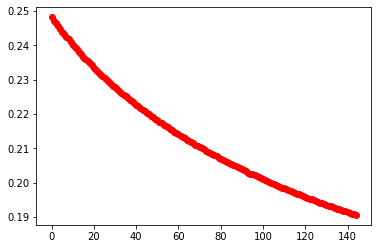

In [22]:
sess=tf.Session()
learning_rate = 0.1
training_epochs = 145
cost_history = np.empty(shape=[1],dtype=float)
n_dim = X.shape[1]
n_class = 2
x = tf.placeholder(tf.float32,[None,n_dim])
W = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))
init = tf.global_variables_initializer()

# Funkcja kosztu
y_ = tf.placeholder(tf.float32,[None,n_class])
y = tf.nn.softmax(tf.matmul(x, W)+ b)
cost_function = tf.reduce_mean(-tf.reduce_sum((y_ * tf.log(y)),reduction_indices=[1]))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)
mse_history = []

for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={x:train_x,y_:train_y})
    cost = sess.run(cost_function,feed_dict={x: train_x,y_: train_y})
    cost_history = np.append(cost_history,cost)
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_history.append(sess.run(mse))

plt.plot(mse_history, 'ro-')
plt.show()

##### 1.5 Predictions using SVM and decision trees

In [29]:
def calculate_accuracy(x, y, svm_kernel="linear"):
    """Calculate the accuracy for a given data and labels.

    Args:
        x (dataframe): Dataframe containing info.
        y (dataframe): Labels for classification
        svm_kernel (str, optional): Kernel used for SVM. Defaults to "linear".
    """
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, stratify=y)
    svc = SVC(kernel=svm_kernel)
    svc.fit(x_train, y_train)
    y_pred_svc = svc.predict(x_test)
    svc_accuracy = round(accuracy_score(y_test, y_pred_svc)*100, 8)
    print(f"SVM Kernel used: {svm_kernel}")
    print('SVC accuracy = ', svc_accuracy,'%')

    clf = DecisionTreeClassifier()
    clf = clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("Decision tree accuracy:", round(accuracy_score(y_test, y_pred)*100, 8))
    print("\n")

new_column_names = []
for i in range(60):
    new_column_names.append(f"Feature {i}")

new_column_names.append("Class")
df = pd.read_csv('sonar.all-data.csv', names=new_column_names)
train = df.replace({'Class': {'M': 0, 'R': 1}})
x = train.drop("Class",axis=1)
y = train['Class']
scaler = StandardScaler()
x = scaler.fit_transform(x)

calculate_accuracy(x, y, svm_kernel="linear")
calculate_accuracy(x, y, svm_kernel="rbf")
calculate_accuracy(x, y, svm_kernel="sigmoid")

SVM Kernel used: linear
SVC accuracy =  72.46376812 %
Decision tree accuracy: 71.01449275


SVM Kernel used: rbf
SVC accuracy =  85.50724638 %
Decision tree accuracy: 71.01449275


SVM Kernel used: sigmoid
SVC accuracy =  79.71014493 %
Decision tree accuracy: 69.56521739




c:\Users\Pawel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

c:\Users\Pawel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



##### 1.6 Accuracy metrics for mlModel

In [30]:
correct_prediction = tf.equal(tf.argmax(pred_y,1), tf.argmax(test_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(f"Accuracy is equal to : {sess.run(accuracy)}%")

Accuracy is equal to : 0.738095223903656%


#### Dataset 2 - CIFAR10

##### 2.1 Download the dataset

In [31]:
from tensorflow.keras.datasets import cifar10
(X_train,y_train) , (X_test, y_test) = cifar10.load_data()

##### 2.2 Process the dataset

In [32]:
X_train = X_train/255
X_test = X_test/255
y_cat_train  = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

##### 2.3.1 Train the model -> simple model

In [33]:
simple_model = Sequential()

simple_model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
simple_model.add(MaxPool2D(pool_size = (2,2)))

simple_model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
simple_model.add(MaxPool2D(pool_size = (2,2)))

simple_model.add(Flatten())

simple_model.add(Dense(512, activation = "relu"))
simple_model.add(Dense(256, activation = "relu"))
simple_model.add(Dense(128, activation = "relu"))

simple_model.add(Dense(10, activation = "softmax"))

simple_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
early_stop = EarlyStopping(monitor = "val_loss", patience = 2)
simple_model.fit(X_train, y_cat_train, validation_data = (X_test, y_cat_test), epochs = 15, callbacks = [early_stop])


Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 40s 799us/sample - loss: 1.5152 - acc: 0.4452 - val_loss: 1.2873 - val_acc: 0.5403
Epoch 2/15
50000/50000 [==============================] - 40s 802us/sample - loss: 1.1259 - acc: 0.6023 - val_loss: 1.0897 - val_acc: 0.6264
Epoch 3/15
50000/50000 [==============================] - 40s 792us/sample - loss: 0.9408 - acc: 0.6700 - val_loss: 0.9959 - val_acc: 0.6537
Epoch 4/15
50000/50000 [==============================] - 40s 791us/sample - loss: 0.7962 - acc: 0.7216 - val_loss: 1.0589 - val_acc: 0.6462
Epoch 5/15
50000/50000 [==============================] - 39s 777us/sample - loss: 0.6709 - acc: 0.7645 - val_loss: 0.9468 - val_acc: 0.6848
Epoch 6/15
50000/50000 [==============================] - 43s 853us/sample - loss: 0.5625 - acc: 0.8043 - val_loss: 1.0138 - val_acc: 0.6835
Epoch 7/15
50000/50000 [==============================] - 42s 838us/sample - loss: 0.4568 - acc: 0.8398 

##### 2.3.2 Train model -> more advanced model

In [34]:
advanced_model = Sequential()

advanced_model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
advanced_model.add(MaxPool2D(pool_size = (2,2)))

advanced_model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
advanced_model.add(MaxPool2D(pool_size = (2,2)))

advanced_model.add(Flatten())

advanced_model.add(Dense(512, activation = "relu"))
advanced_model.add(Dense(368, activation = "relu"))
advanced_model.add(Dense(256, activation = "relu"))
advanced_model.add(Dropout(0.4))
advanced_model.add(Dense(128, activation = "relu"))
advanced_model.add(Dense(64, activation = "relu"))

advanced_model.add(Dense(10, activation = "softmax"))

advanced_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
early_stop = EarlyStopping(monitor = "val_loss", patience = 2)
advanced_model.fit(X_train, y_cat_train, validation_data = (X_test, y_cat_test), epochs = 15, callbacks = [early_stop])


Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 44s 882us/sample - loss: 1.6341 - acc: 0.3890 - val_loss: 1.4942 - val_acc: 0.4890
Epoch 2/15
50000/50000 [==============================] - 42s 841us/sample - loss: 1.2395 - acc: 0.5652 - val_loss: 1.2058 - val_acc: 0.5813
Epoch 3/15
50000/50000 [==============================] - 44s 880us/sample - loss: 1.0490 - acc: 0.6381 - val_loss: 1.0657 - val_acc: 0.6339
Epoch 4/15
50000/50000 [==============================] - 43s 850us/sample - loss: 0.9020 - acc: 0.6928 - val_loss: 1.0495 - val_acc: 0.6503
Epoch 5/15
50000/50000 [==============================] - 43s 854us/sample - loss: 0.7802 - acc: 0.7346 - val_loss: 1.0581 - val_acc: 0.6481
Epoch 6/15
50000/50000 [==============================] - 43s 851us/sample - loss: 0.6613 - acc: 0.7736 - val_loss: 1.0864 - val_acc: 0.6654


##### 2.4.1 Metrics and accuracy for simple model

In [35]:
metrics = pd.DataFrame(simple_model.history.history)
metrics

,loss,acc,val_loss,val_acc
0,1.515241,0.44524,1.287343,0.5403
1,1.125881,0.60234,1.089656,0.6264
2,0.940773,0.67000,0.995947,0.6537
3,0.796204,0.72158,1.058904,0.6462
4,0.670896,0.76454,0.946812,0.6848
5,0.562493,0.80434,1.013834,0.6835
6,0.456819,0.83982,1.117503,0.6733


##### 2.4.1 Metrics and accuracy for advanced model

In [36]:
metrics = pd.DataFrame(advanced_model.history.history)
metrics

,loss,acc,val_loss,val_acc
0,1.634062,0.38904,1.494192,0.4890
1,1.239473,0.56524,1.205834,0.5813
2,1.049030,0.63808,1.065720,0.6339
3,0.902034,0.69282,1.049542,0.6503
4,0.780227,0.73458,1.058148,0.6481
5,0.661311,0.77358,1.086442,0.6654


#### Dataset 3 - Fashion MNIST

##### 3.1 Download dataset

In [37]:
%%capture
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

##### 3.2 Parse dataset

In [38]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train/255.
x_test = x_test/255.

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

##### 3.3 Train model

In [39]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=3, activation='relu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(24, kernel_size=3, activation='relu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=3, activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
callback_list=[ModelCheckpoint(filepath="model.h5", monitor='val_acc', save_best_only=True, mode='max')]

model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=6,verbose=1,callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 177s 3ms/sample - loss: 0.5990 - acc: 0.7933 - val_loss: 0.5636 - val_acc: 0.8830
Epoch 2/6
60000/60000 [==============================] - 177s 3ms/sample - loss: 0.3436 - acc: 0.8757 - val_loss: 0.2773 - val_acc: 0.8994
Epoch 3/6
60000/60000 [==============================] - 174s 3ms/sample - loss: 0.2917 - acc: 0.8935 - val_loss: 0.2435 - val_acc: 0.9098
Epoch 4/6
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.2590 - acc: 0.9044 - val_loss: 0.2550 - val_acc: 0.9043
Epoch 5/6
60000/60000 [==============================] - 177s 3ms/sample - loss: 0.2391 - acc: 0.9108 - val_loss: 0.2232 - val_acc: 0.9162
Epoch 6/6
60000/60000 [==============================] - 171s 3ms/sample - loss: 0.2249 - acc: 0.9173 - val_loss: 0.2362 - val_acc: 0.9158


##### 3.4 Evaluate model

In [40]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 5s 517us/sample - loss: 0.2362 - acc: 0.9158


[0.2361751497745514, 0.9158]

##### 3.4 Metrics and accuracy

In [41]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,acc,val_loss,val_acc
0,0.599018,0.793300,0.563556,0.8830
1,0.343565,0.875683,0.277272,0.8994
2,0.291661,0.893450,0.243479,0.9098
3,0.259030,0.904417,0.254980,0.9043
4,0.239107,0.910833,0.223165,0.9162
5,0.224885,0.917333,0.236175,0.9158


##### 3.5 Confusion matrix

Text(0.5, 160.41299999999993, 'Predicted label')

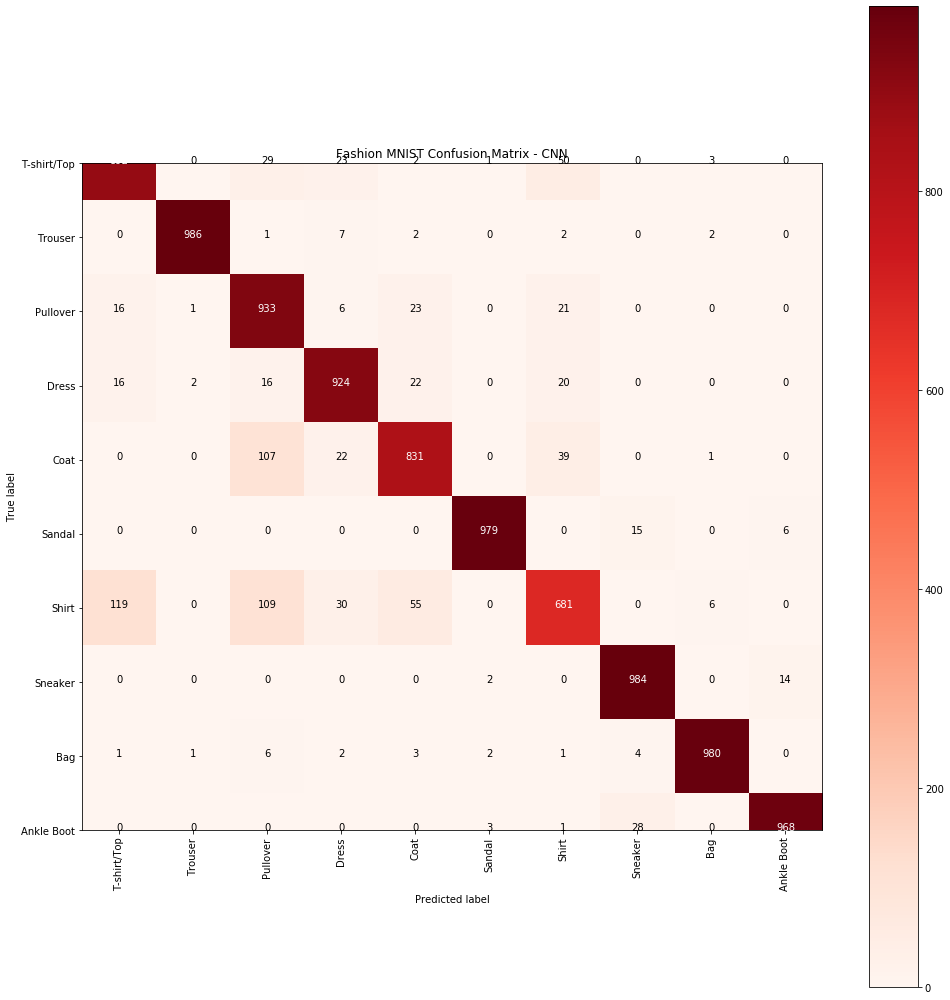

In [42]:
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
preds = model.predict(x_test)
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(preds,axis=1))

plt.figure(figsize=(14,14))
plt.imshow(cm,cmap=plt.cm.Reds)
plt.title('Fashion MNIST Confusion Matrix - CNN')
plt.colorbar()
plt.xticks(np.arange(10), classes, rotation=90)
plt.yticks(np.arange(10), classes)

for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
    horizontalalignment="center",
    color="white" if cm[i, j] > 500 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

#### Dataset 4 - Twitter

##### 4.1.1 Download Tweets

In [43]:
max_tweets = 10000
attributes_container = []
hashtag_scraper = TwitterHashtagScraper("#ukraine")
generator = hashtag_scraper.get_items()
tweets = [next(generator) for _ in range(max_tweets)]
for tweet in tweets:
    attributes_container.append([tweet.date, tweet.url, tweet.content, tweet.id])

tweets_df = pd.DataFrame(attributes_container, columns=["date", "URL", "content", "id"])
tweets_df.to_csv("twitter_data.csv")
tweets_df.head()

,date,URL,content,id
0,2022-12-10 23:06:14+00:00,https://twitter.com/vbl68/status/1601714937360...,Ukrainian Drone Drops grenade Into Russian Sol...,1601714937360920577
1,2022-12-10 23:06:13+00:00,https://twitter.com/JmyLss/status/160171493550...,Des #Ukrainiens abandonnent leurs compagnons d...,1601714935507349504
2,2022-12-10 23:06:13+00:00,https://twitter.com/gplaucio/status/1601714934...,#ukraine\nhttps://t.co/sHh1vbPnXY,1601714934878175233
3,2022-12-10 23:06:03+00:00,https://twitter.com/Vierotchka/status/16017148...,@afshinrattansi So why do they continue pumpin...,1601714890938667008
4,2022-12-10 23:06:02+00:00,https://twitter.com/FuckPutinBot/status/160171...,"Joan zaitez zeure burua, Putin!\n(Basque)\n\n#...",1601714890531553282


##### 4.1.2 If datasets were downlaoded simply load them

In [44]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

##### 4.2 Data preprocessing

In [45]:
X_train, X_test, y_train, y_test = train_test_split(train[['text']].values, train[['target']], test_size=0.2, random_state=2012)

##### 4.3 Word tokenization

In [46]:
tokenizer = Tokenizer()

vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train[:,0])
text_length = []
for line in X_train[:,0]:
    text_length.append(len(line.split()))
text_length = np.array(text_length)
max_len = 20

X_seq_train = pad_sequences(tokenizer.texts_to_sequences(X_train[:, 0]), padding='post', maxlen=max_len)
X_seq_test = pad_sequences(tokenizer.texts_to_sequences(X_test[:, 0]), padding='post', maxlen=max_len)

##### 4.4 Create model

In [47]:
sequence = tf.keras.Input(shape=(max_len,))
embdeddings = layers.Embedding(vocab_size, 16)(sequence)

pooling = layers.GlobalAveragePooling1D()(embdeddings)
output = layers.Dense(1, activation='sigmoid')(pooling)
model = tf.keras.Model(inputs=sequence, outputs=output)
model.compile(optimizer="adam",
              loss='mae',
              metrics=['accuracy'])

model.summary()
model.fit(X_seq_train, y_train,
        epochs=21,
        validation_data=(X_seq_test, y_test))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 20, 16)            160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 160,017
Trainable params: 160,017
Non-trainable params: 0
_________________________________________________________________
Train on 6090 samples, validate on 1523 samples
Epoch 1/21
6090/6090 [==============================] - 1s 101us/sample - loss: 0.4786 - acc: 0.6146 - val_loss: 0.4520 - val_acc: 0.6014
Epoch 2/21
6090/6090 [==============================] - 0s 60us/s

##### 4.5 Evaluate the model

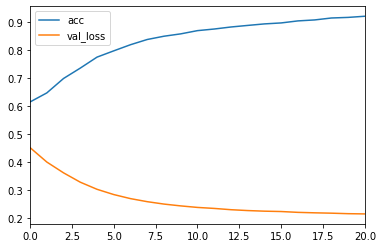

In [48]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()
model_loss[['acc','val_loss']].plot()